# Feature Engineering
The process of reating new features from raw data to increase the predictive power of the learning algorithm.

### Types of Data (Measurement)

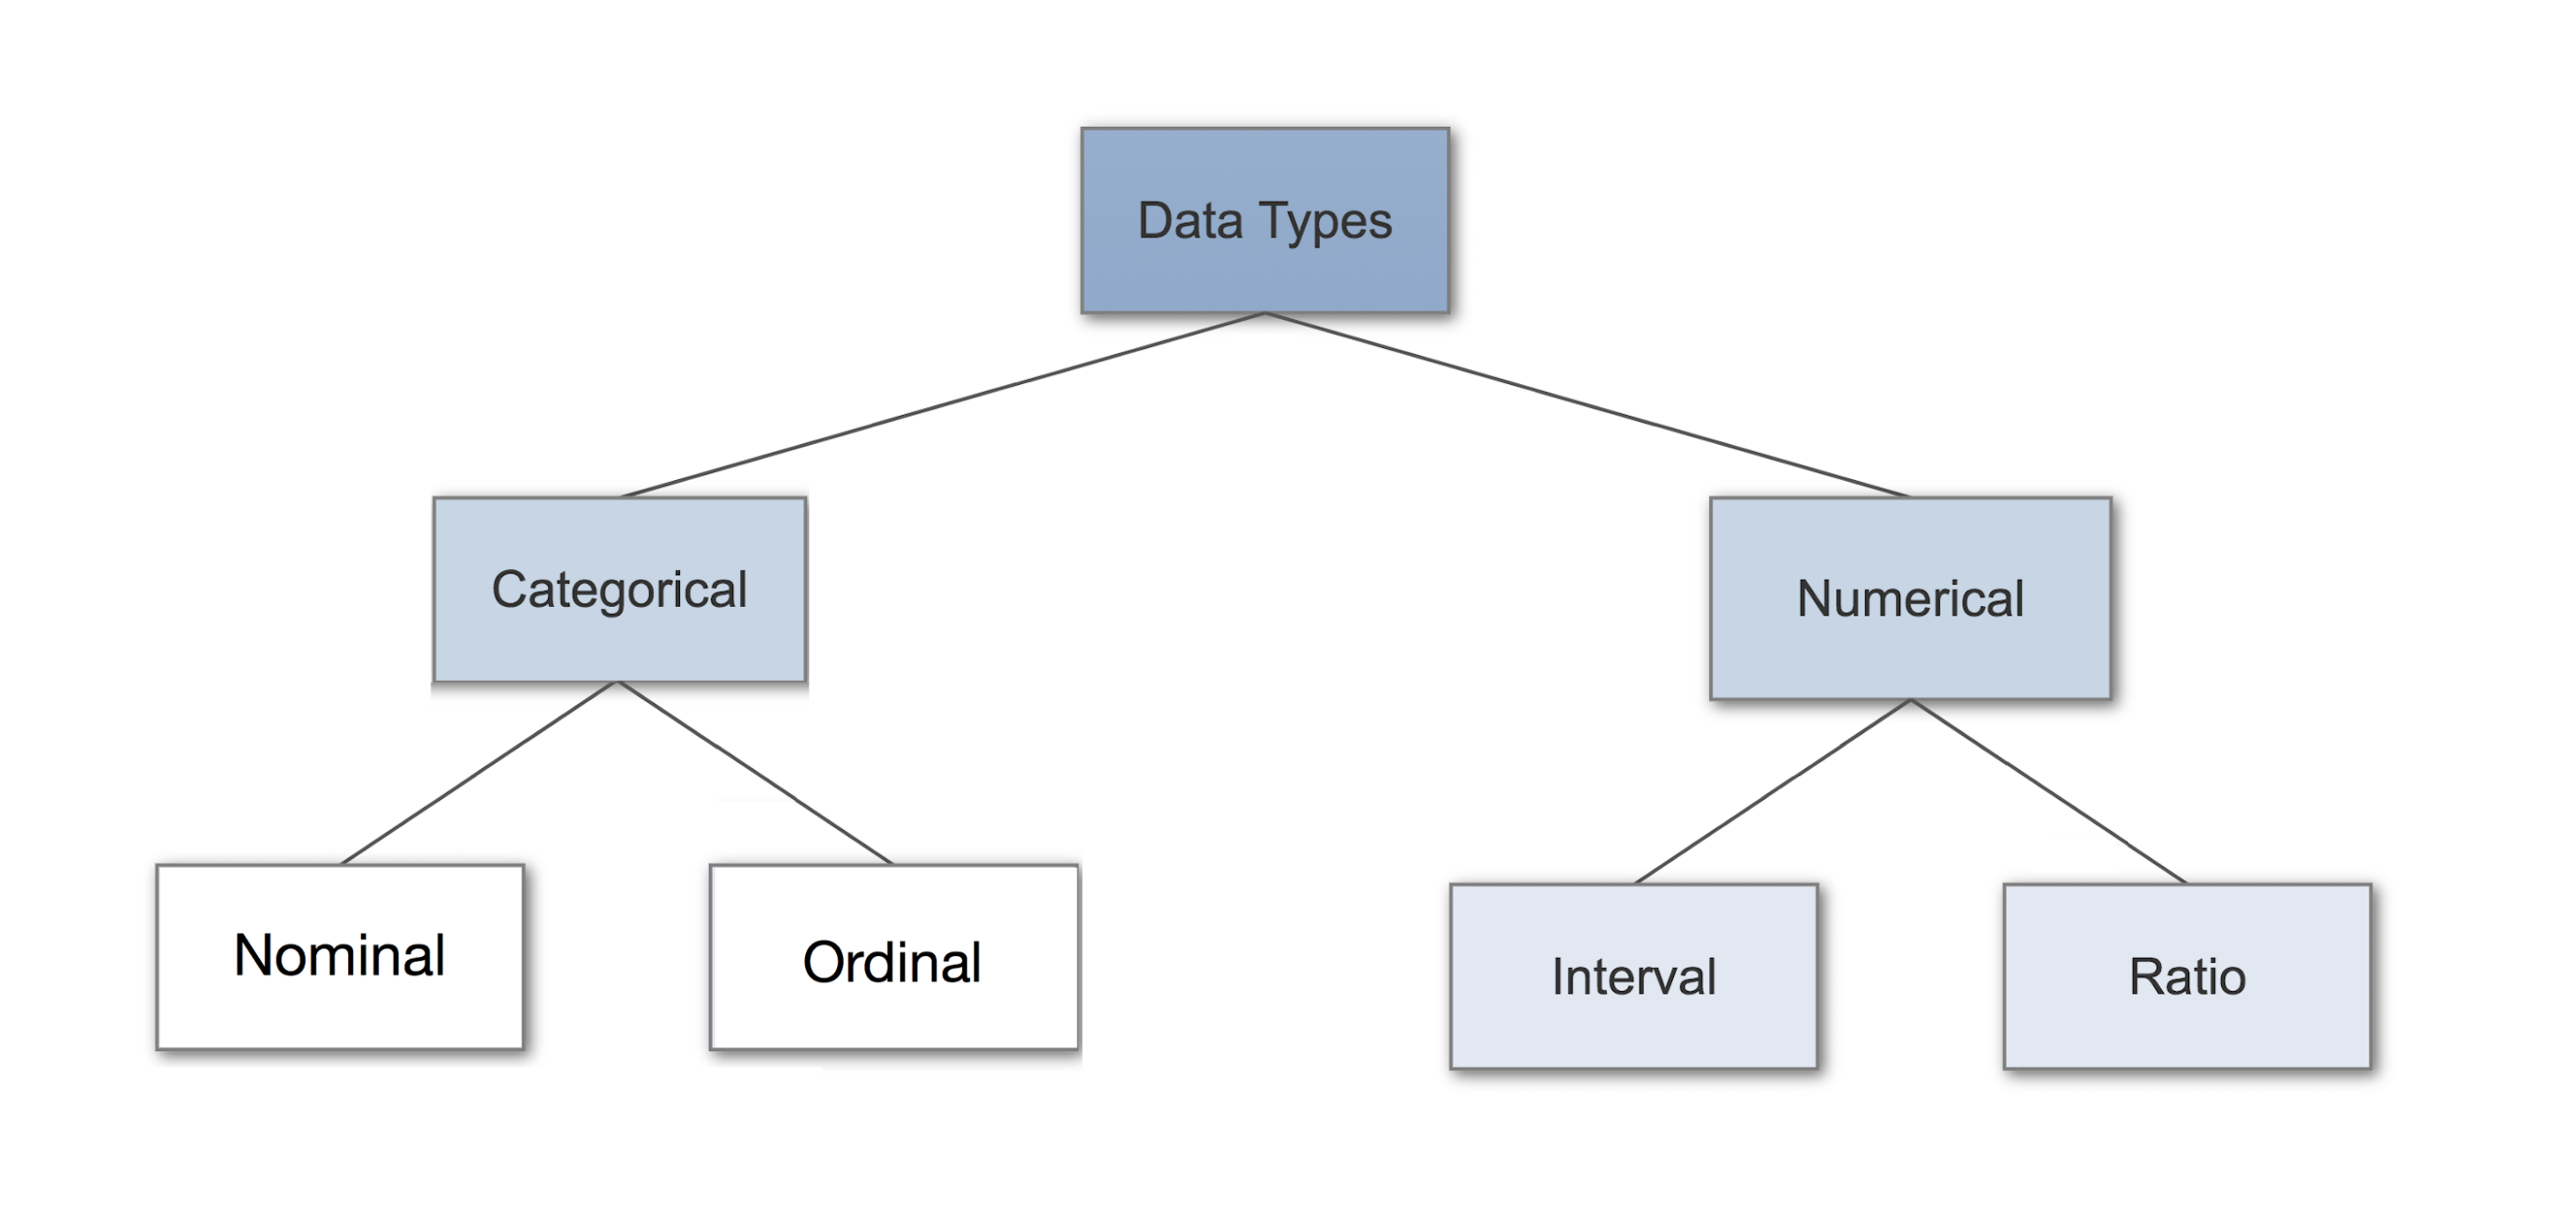

- **Nominal** - not ordered (e.g. gender)
- **Ordinal** - ordered (e.g. shirt size)
- **Interval** - difference in value is consistent but 0 does not mean none (e.g. temperature in Celsius)
- **Ratio** - difference in value is consistent and 0 means none (e.g. height)

Let's try it with this sample data. In the data, we have color, size, and classlabel as categotical variables.

In [73]:
import pandas as pd
import numpy as np

student = pd.DataFrame([
        ['M', 'O+', 10, 'medium', 0],
        ['M', 'AB-', 11, 'high', 2],
        ['F', 'B-', 12, 'high', -1],
        ['F', 'A+', 10, np.NaN, 1],
        ['M', 'O+', 12, 'medium', 1],
        ['F', 'O+', 11, 'low', 2]])

student.columns = ['gender', 'blood_type', 'age', 'edu_level', 'satisfaction']
student

,gender,blood_type,age,edu_level,satisfaction
0,M,O+,10,medium,0
1,M,AB-,11,high,2
2,F,B-,12,high,-1
3,F,A+,10,NaN,1
4,M,O+,12,medium,1
5,F,O+,11,low,2


### 1. Ordinal Encoder

In [19]:
from sklearn.preprocessing import OrdinalEncoder

student.fillna("missing", inplace=True)

# define ordinal encoding
encoder = OrdinalEncoder()

# transform data
result = encoder.fit_transform(student.edu_level.values.reshape(-1, 1))
print(result)

[[2.]
 [0.]
 [0.]
 [3.]
 [2.]
 [1.]]


Problems:
- our missing value is encoded as a separate class (3.0)
- the order of our data is not respected.

In [30]:
cat = pd.Categorical(student.edu_level, categories=["missing", "low", "medium", "high"], ordered=True)
cat

[medium, high, high, NaN, medium, low]
Categories (4, object): [missing < low < medium < high]

#### Factorize 
Encode the object as an enumerated type or categorical variable.

In [31]:
labels, unique = pd.factorize(cat, sort=True) 
student.edu_level = labels
student

,gender,blood_type,age,edu_level,satisfaction
0,M,O+,10,1,0
1,M,AB-,11,2,2
2,F,B-,12,2,-1
3,F,A+,10,-1,1
4,M,O+,12,1,1
5,F,O+,11,0,2


### 2. Label Encoder

A simple way to handle categotical data is to do simple encoding. Here, we simply assign a number for each unique category.

In [33]:
gender_mapping = {
                'M': 0,
                'F': 1,}
student['gender'] = student['gender'].map(gender_mapping)
student

,gender,blood_type,age,edu_level,satisfaction
0,0,O+,10,1,0
1,0,AB-,11,2,2
2,1,B-,12,2,-1
3,1,A+,10,-1,1
4,0,O+,12,1,1
5,1,O+,11,0,2


Mapping can be difficult when working with a lot of categories.

In [41]:
from sklearn.preprocessing import LabelEncoder

X = student[['gender']].values.reshape(-1,1)

gender_map = LabelEncoder()
X = gender_map.fit_transform(X)

student["gender"] = X
student

,gender,blood_type,age,edu_level,satisfaction
0,1,O+,10,medium,0
1,1,AB-,11,high,2
2,0,B-,12,high,-1
3,0,A+,10,NaN,1
4,1,O+,12,medium,1
5,0,O+,11,low,2


### 3. One Hot Encoding

Another common method used in feature engineering is known as `One Hot Encoding`. In One Hot Encoding, you take all categories in a column and make a new feature for each. If that category is present for that observation, then we set the value as 1. If not, then we set it as 0. Again, we can easily do this using scikit-learn. Isn't scikit-learn awesome?

In [78]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
encoded = ohe.fit_transform(student[["blood_type"]])

headers = ohe.get_feature_names(["blood_type"])

df_X = pd.DataFrame(encoded, columns = headers)
df_X

,blood_type_A+,blood_type_AB-,blood_type_B-,blood_type_O+
0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,1.0


### 4. Dimensionality Reduction
reducing the dimension of the feature space is called “dimensionality reduction.” 
 - Feature selection / elimination - dropping features
 - Feature extraction - combining features to form new ones


**Principal component analysis (PCA)** is a technique for feature extraction. PCA converts the correlation of the different features into a 2D plot.

In [105]:
from sklearn.datasets import load_iris

data = load_iris()
iris = pd.DataFrame(data['data'], columns=[data['feature_names']])
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [92]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(iris)
x

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [124]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, pd.DataFrame(data['target'], columns=["target"])], axis = 1)

finalDf

,principal component 1,principal component 2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


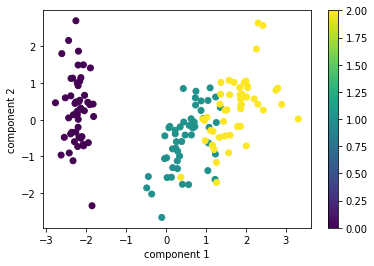

In [129]:
plt.scatter(finalDf.iloc[:, 0], finalDf.iloc[:, 1],
            c=data.target)

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();